In [3]:
import pandas as pd

# Load data
data = loadmat('/home/vincent/AAA_projects/MVCS/Neuroscience/downsampled/EEG_DS_Struct_0101.mat') # load your EEG data here
stim_data = pd.read_excel('/home/vincent/AAA_projects/MVCS/Neuroscience/EEG-tES-Chaos-Neural-Net/stim_data.xlsx') # load your stimulation data here
 
# Fill null values in 'Sub#' column
stim_data['Sub#'].fillna(method='ffill', inplace=True)

DSamp = data['DSamp']

# Get data parameters
triggers = DSamp[0][0][0]
EEGdata = DSamp[0][0][1]
fs = DSamp[0][0][2][0][0]
fsOld = DSamp[0][0][3][0][0]
time = DSamp[0][0][4][0]
label = DSamp[0][0][5]
nchan = DSamp[0][0][6][0][0]
rate = DSamp[0][0][7][0][0]
npt = DSamp[0][0][8][0][0]
Subj = DSamp[0][0][9][0]
ptrackerPerf = DSamp[0][0][10]
ptrackerTime = DSamp[0][0][11]
ptrackerfs = DSamp[0][0][12][0][0]

# List of unwanted channel names
unwanted_channels = ['BIP1', 'BIP2', 'RESP1']

# Create a mask where True indicates that the channel is not unwanted
mask = np.array([ch[0][0] not in unwanted_channels for ch in label])

# Filter out unwanted channels from the label data
filtered_label = label[mask]

# Convert the filtered list back to numpy array and replace the original label
label = np.array(filtered_label, dtype=object)

# Transpose EEGdata
EEGdata = EEGdata.T

# Filter out unwanted channels from the EEG data
filtered_EEGdata = EEGdata[:, mask]

# Transpose it back if needed
filtered_EEGdata = filtered_EEGdata.T

#Select subject
stim_data = stim_data[stim_data['Sub#'] == 1]

stim_data_df = pd.DataFrame(stim_data)

def flatten(item):
    if isinstance(item, list):
        for subitem in item:
            yield from flatten(subitem)
    elif isinstance(item, np.ndarray):
        for subitem in item.flatten():
            yield from flatten(subitem)
    else:
        yield item

            
trigger_list = []  
for trigger in triggers[0]:
    trigger_list.append([list(flatten(trigger[0])),  # Time
                         list(flatten(trigger[1])),  # SampleNum
                         list(flatten(trigger[2])),  # FileNum
                         list(flatten(trigger[3])),  # EventType
                         list(flatten(trigger[4])),  # EventDescription
                         list(flatten(trigger[5])) if trigger[5].size else ['Unknown']  # StimType
                        ])


# Create DataFrame and transpose it
eeg_df = pd.DataFrame(filtered_EEGdata.T)  # Transpose the data

# Display the updated DataFrame

# We convert the labels list into a simple list (previously it was a list of numpy arrays)
simple_label = [label_item[0][0] for label_item in label]

eeg_df.columns = simple_label  # Assign column names

# Create DataFrames
triggers_df = pd.DataFrame(trigger_list, columns=["Time", "SampleNum", "EventType1", "EventType", "EventDescription", "StimType"])
triggers_df = triggers_df.drop(['EventType1', 'SampleNum'], axis=1)

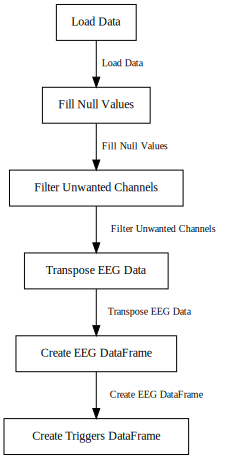

In [4]:
from graphviz import Digraph, Source

# Create the graph
graph = Digraph(format='png')

# Add nodes to the graph
graph.node('LoadData', shape='rect', label="Load Data", fontsize='12')
graph.node('FillNull', shape='rect', label="Fill Null Values", fontsize='12')
graph.node('FilterUnwanted', shape='rect', label="Filter Unwanted Channels", fontsize='12')
graph.node('TransposeEEG', shape='rect', label="Transpose EEG Data", fontsize='12')
graph.node('DataFrameEEG', shape='rect', label="Create EEG DataFrame", fontsize='12')
graph.node('DataFrameTriggers', shape='rect', label="Create Triggers DataFrame", fontsize='12')

# Add edges between nodes
graph.edge('LoadData', 'FillNull', label="Load Data", fontsize='10')
graph.edge('FillNull', 'FilterUnwanted', label="Fill Null Values", fontsize='10')
graph.edge('FilterUnwanted', 'TransposeEEG', label="Filter Unwanted Channels", fontsize='10')
graph.edge('TransposeEEG', 'DataFrameEEG', label="Transpose EEG Data", fontsize='10')
graph.edge('DataFrameEEG', 'DataFrameTriggers', label="Create EEG DataFrame", fontsize='10')

# Display the graph visualization directly in Jupyter Notebook/Lab
src = Source(graph.source)
src

In [5]:
# Assuming that stim_data_df looks something like this:
stim_data_df = pd.DataFrame({
    'Sub#': [1, 1, 1, 1, 1, 1],
    'Session': [1, 2, 3, 4, 5, 6],
    'File Num': [101, 102, 103, 104, 105, 106],
    'StimTypeBlock1': ['M30', 'M30', 'P30', 'F5', 'F5', 'P30'],
    'StimTypeBlock2': ['F30', 'F30', 'P0', 'M5', 'M5', 'P0'],
    'StimTypeBlock3': ['F0', 'F0', 'P5', 'M0', 'M0', 'P5'],
    'StimAmplitude_mA_block1': [1, 0.5, 0.5, 0.5, 1, 1],
    'StimAmplitude_mA_block2': [1, 0.5, 0.5, 0.5, 1, 1],
    'StimAmplitude_mA_block3': [1, 0.5, 0.5, 0.5, 1, 1],
})

# Also assuming that triggers_df looks something like this:
triggers_df = pd.DataFrame({
    'Time': [619.499, 654.746, 770.515, 805.571, 921.515, 956.651, 1072.551, 1107.578, 1819.593, 1854.888, 1970.669, 2005.715, 2121.644, 2156.695, 2272.756, 2307.798, 3019.822, 3019.924],
    'EventDescription': ['Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop', 'Stim Start', 'Stim Stop'],
    'StimType': ['M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30', 'M30']
})

def get_stim_info(sub, session, stim_type):
    mask = (stim_data_df['Sub#'] == sub) & (stim_data_df['Session'] == session)
    matching_rows = stim_data_df[mask]
    amplitudes = []
    blocks = []
    file_nums = []

    for index, row in matching_rows.iterrows():
        for block in range(1, 4):
            if row[f'StimTypeBlock{block}'] == stim_type:
                amplitudes.append(row[f'StimAmplitude_mA_block{block}'])
                blocks.append(block)
                file_nums.append(row['File Num'])
    
    return amplitudes, blocks, file_nums

# Adding 'Sub#' and 'Session' columns to triggers_df
triggers_df['Sub#'] = 1
triggers_df['Session'] = 1

# Define unique_combinations before using it
unique_combinations = pd.concat([stim_data_df[["Sub#", "Session", "StimTypeBlock1"]], 
                                 stim_data_df[["Sub#", "Session", "StimTypeBlock2"]].rename(columns={"StimTypeBlock2": "StimTypeBlock1"}), 
                                 stim_data_df[["Sub#", "Session", "StimTypeBlock3"]].rename(columns={"StimTypeBlock3": "StimTypeBlock1"}), 
                                 triggers_df[["Sub#", "Session", "StimType"]].rename(columns={"StimType": "StimTypeBlock1"})]).drop_duplicates()

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=["Sub#", "Session", "StimType", "Amplitudes", "Block", "File Num"])

for _, row in unique_combinations.iterrows():
    sub = row["Sub#"]
    session = row["Session"]
    stim_type = row["StimTypeBlock1"]
    amplitudes, blocks, file_nums = get_stim_info(sub, session, stim_type)

    for amp, block, file_num in zip(amplitudes, blocks, file_nums):
        df_temp = pd.DataFrame([{"Sub#": sub, 
                                "Session": session, 
                                "StimType": stim_type, 
                                "Amplitudes": amp, 
                                "Block": block, 
                                "File Num": file_num}], 
                                columns=["Sub#", "Session", "StimType", "Amplitudes", "Block", "File Num"])
        results_df = pd.concat([results_df, df_temp], ignore_index=True)


def get_trigger_info(sub, session, stim_type):
    mask = (triggers_df['Sub#'] == sub) & (triggers_df['Session'] == session) & (triggers_df['StimType'] == stim_type)
    matching_rows = triggers_df[mask]
    return matching_rows[['Time', 'EventDescription']]

# To get the amplitude from 'results_df' for a given Sub#, Session, and StimType
def get_stim_amplitude(sub, session, stim_type):
    mask = (results_df['Sub#'] == sub) & (results_df['Session'] == session) & (results_df['StimType'] == stim_type)
    matching_rows = results_df[mask]
    if not matching_rows.empty:
        return matching_rows['Amplitudes'].values[0]
    else:
        return None

# Create a new column in triggers_df with the corresponding amplitude
triggers_df['Amplitude'] = triggers_df.apply(lambda row: get_stim_amplitude(row['Sub#'], row['Session'], row['StimType']), axis=1)

# Drop the 'Amplitudes' column from 'results_df'
results_df.drop('Amplitudes', axis=1, inplace=True)

# Then perform the merge
merged_stim_df = pd.merge(results_df, triggers_df, on=['Sub#', 'Session', 'StimType'], how='inner')
merged_stim_df['Time'] = merged_stim_df['Time'] * 1000

# Assuming the sampling rate is 1000 Hz
sampling_rate = 1000

# Calculate time values in milliseconds
num_samples = len(eeg_df)
time_in_seconds = [(i / sampling_rate) for i in range(num_samples)]
time_in_milliseconds = [round(t * 1000, 2) for t in time_in_seconds]

# Modify the 'Time' column in eeg_df to match the 'Time' values in merged_stim_df
eeg_df['Time'] = time_in_milliseconds

# Assuming that DSamp[0][0][5] is your data
data_as_list = [arr.tolist()[0] for arr in DSamp[0][0][5]]

eeg_label_df = pd.DataFrame(data_as_list, columns=['EEG Electrode Labels'])
# List of unwanted channel names
unwanted_channels = ['BIP1', 'BIP2', 'RESP1']

# Filter out unwanted channels from the DataFrame
eeg_label_df = eeg_label_df[~eeg_label_df['EEG Electrode Labels'].isin(unwanted_channels)]

In [6]:
print(merged_stim_df.head())
print(merged_stim_df.tail())
print(eeg_df.head())
print(eeg_df.tail())

  Sub# Session StimType Block File Num      Time EventDescription  Amplitude
0    1       1      M30     1      101  619499.0       Stim Start        1.0
1    1       1      M30     1      101  654746.0        Stim Stop        1.0
2    1       1      M30     1      101  770515.0       Stim Start        1.0
3    1       1      M30     1      101  805571.0        Stim Stop        1.0
4    1       1      M30     1      101  921515.0       Stim Start        1.0
   Sub# Session StimType Block File Num       Time EventDescription  Amplitude
13    1       1      M30     1      101  2156695.0        Stim Stop        1.0
14    1       1      M30     1      101  2272756.0       Stim Start        1.0
15    1       1      M30     1      101  2307798.0        Stim Stop        1.0
16    1       1      M30     1      101  3019822.0       Stim Start        1.0
17    1       1      M30     1      101  3019924.0        Stim Stop        1.0
            Fp1           Fpz           Fp2           F7        

# Make the eeg df a npy

In [7]:
# Extract EEG channel names (excluding 'Time')
eeg_channel_names = eeg_df.columns[:-1]

# Create a dictionary to store EEG data for each channel
eeg_data_dict = {}

# Populate the dictionary with EEG data
for channel in eeg_channel_names:
    eeg_data_dict[channel] = eeg_df[channel].values

# Convert the dictionary values to a numpy array
eeg_data_array = np.array([eeg_data_dict[channel] for channel in eeg_channel_names]).T

# Save the numpy array with EEG data as a single .npy file
save_path = '/home/vincent/AAA_projects/MVCS/Neuroscience/eeg_data_with_channels.npy'
np.save(save_path, eeg_data_array)

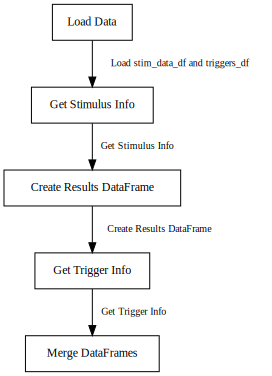

In [17]:
from graphviz import Digraph, Source

# Create the graph
graph = Digraph(format='png')

# Add nodes to the graph
graph.node('LoadData', shape='rect', label="Load Data", fontsize='12')
graph.node('GetStimInfo', shape='rect', label="Get Stimulus Info", fontsize='12')
graph.node('CreateResults', shape='rect', label="Create Results DataFrame", fontsize='12')
graph.node('GetTriggerInfo', shape='rect', label="Get Trigger Info", fontsize='12')
graph.node('MergeDataFrames', shape='rect', label="Merge DataFrames", fontsize='12')

# Add edges between nodes
graph.edge('LoadData', 'GetStimInfo', label="Load stim_data_df and triggers_df", fontsize='10')
graph.edge('GetStimInfo', 'CreateResults', label="Get Stimulus Info", fontsize='10')
graph.edge('CreateResults', 'GetTriggerInfo', label="Create Results DataFrame", fontsize='10')
graph.edge('GetTriggerInfo', 'MergeDataFrames', label="Get Trigger Info", fontsize='10')

# Display the graph visualization directly in Jupyter Notebook/Lab
src = Source(graph.source)
src

In [18]:
# Specify the directory paths where you want to save the CSV files
merged_stim_directory = '/home/vincent/AAA_projects/MVCS/Neuroscience/DataFrames'
eeg_directory = '/home/vincent/AAA_projects/MVCS/Neuroscience/DataFrames'

# Save 'merged_stim_df' to CSV
merged_stim_df.to_csv(f"{merged_stim_directory}/merged_stim_df.csv", index=False)

# Save 'eeg_df' to CSV
eeg_df.to_csv(f"{eeg_directory}/eeg_df.csv", index=False)

print("DataFrames saved to CSV files successfully.")

DataFrames saved to CSV files successfully.


In [ ]:
triggers = DSamp[0][0][0]
print("Triggers: ", triggers)

EEGdata = DSamp[0][0][1]
print("EEGdata: ", EEGdata)

fs = DSamp[0][0][2][0][0] 
print("fs: ", fs)

fsOld = DSamp[0][0][3][0][0] 
print("fsOld: ", fsOld)

time = DSamp[0][0][4][0]
print("Time: ", time)

label = DSamp[0][0][5]
print("Label: ", label)

nchan = DSamp[0][0][6][0][0]
print("nchan: ", nchan)

rate = DSamp[0][0][7][0][0]
print("Rate: ", rate)

npt = DSamp[0][0][8][0][0]
print("npt: ", npt)

Subj = DSamp[0][0][9][0]
print("Subj: ", Subj)

ptrackerPerf = DSamp[0][0][10]
print("PtrackerPerf: ", ptrackerPerf)

ptrackerTime = DSamp[0][0][11]
print("PtrackerTime: ", ptrackerTime)

ptrackerfs = DSamp[0][0][12][0][0]
print("Ptrackerfs: ", ptrackerfs)

Triggers:  [[(array([[20.428]]), array([[20429]], dtype=uint16), array(['0002'], dtype='<U4'), array([[2]], dtype=uint8), array(['Block Start'], dtype='<U11'), array([], shape=(1, 0), dtype=float64))
  (array([[619.442]]), array([[619443]], dtype=int32), array(['0002'], dtype='<U4'), array([[2]], dtype=uint8), array(['Block Start'], dtype='<U11'), array([], shape=(1, 0), dtype=float64))
  (array([[619.499]]), array([[619500]], dtype=int32), array(['0016'], dtype='<U4'), array([[16]], dtype=uint8), array(['Stim Start'], dtype='<U10'), array(['M30'], dtype='<U3'))
  (array([[654.746]]), array([[654747]], dtype=int32), array(['0032'], dtype='<U4'), array([[32]], dtype=uint8), array(['Stim Stop'], dtype='<U9'), array([], shape=(1, 0), dtype=float64))
  (array([[770.515]]), array([[770516]], dtype=int32), array(['0016'], dtype='<U4'), array([[16]], dtype=uint8), array(['Stim Start'], dtype='<U10'), array(['M30'], dtype='<U3'))
  (array([[805.571]]), array([[805572]], dtype=int32), array(['0

# load the csv's for the RNN from the Multifractal Analysis, and the eeg + stim csv's, after Multifractal Analysis

In [3]:
# Define the file paths
base_dir = '/home/vincent/AAA_projects/MVCS/Neuroscience/' 
eeg_df_path = base_dir + 'DataFrames/eeg_df.csv'
merged_stim_df_path = base_dir + 'DataFrames/merged_stim_df.csv'
hurst_exponents_path = base_dir + 'HurstExponents/hurst_exponents_df.csv'
rnn_mfdfa_X_path = base_dir + 'RNN_data/rnn_X_data_combined.npy'

# load data
eeg_df = pd.read_csv(eeg_df_path)
merged_stim_df = pd.read_csv(merged_stim_df_path)
hurst_exponents_df = pd.read_csv(hurst_exponents_path)
rnn_X_data_combined = np.load(rnn_mfdfa_X_path)

In [4]:
# Print the columns of eeg_df
print("Columns of eeg_df:")
print(eeg_df.columns)

# Print the columns of merged_stim_df
print("Columns of merged_stim_df:")
print(merged_stim_df.columns)

# Print the columns of hurst_exponents_df
print("Columns of hurst_exponents_df:")
print(hurst_exponents_df.columns)

# Assuming rnn_mfdfa_X_df is a NumPy array
print("Number of columns in rnn_X_data_combined:", rnn_X_data_combined.shape[1])

Columns of eeg_df:
Index(['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2',
       'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2',
       'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'Oz', 'O2', 'Time'],
      dtype='object')
Columns of merged_stim_df:
Index(['Sub#', 'Session', 'StimType', 'Block', 'File Num', 'Time',
       'EventDescription', 'Amplitude'],
      dtype='object')
Columns of hurst_exponents_df:
Index(['0'], dtype='object')
Number of columns in rnn_X_data_combined: 100


# Change everything to numerical

In [5]:
# Define mappings for frequency and location
frequency_mapping = {
    "F0": 0,
    "F5": 5,
    "F30": 30,
    "M0": 0,
    "M5": 5,
    "M30": 30,
    "P0": 0,
    "P5": 5,
    "P30": 30
}

location_mapping = {
    "F0": 1,
    "F5": 1,
    "F30": 1,
    "M0": 2,
    "M5": 2,
    "M30": 2,
    "P0": 3,
    "P5": 3,
    "P30": 3
}

# Check if 'StimType' column is present in the dataframe
if 'StimType' in merged_stim_df.columns:
    # Proceed with replacement of values and dropping the column
    merged_stim_df["Frequency"] = merged_stim_df["StimType"].replace(frequency_mapping)
    merged_stim_df["Location"] = merged_stim_df["StimType"].replace(location_mapping)
    merged_stim_df.drop('StimType', axis=1, inplace=True)
else:
    print("The 'StimType' column does not exist in the dataframe.")

# Replace "Stim Start" with 1 and "Stim Stop" with 2
merged_stim_df["EventDescription"] = merged_stim_df["EventDescription"].replace({
    "Stim Start": 1,
    "Stim Stop": 0
})

In [6]:
print(eeg_df['Time'].head())
print(merged_stim_df['Time'].head())

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: Time, dtype: float64
0    619499.0
1    654746.0
2    770515.0
3    805571.0
4    921515.0
Name: Time, dtype: float64


In [7]:
# First, let's perform the merge operation
merged_eeg_stim_df = pd.merge_asof(eeg_df, merged_stim_df, on='Time', direction='backward')

# Create 'Stim' column based on 'EventDescription'.
# If 'EventDescription' is 1 (Stim start) and the 'Time' is >= 619499, we set 'Stim' as 1. Otherwise, 'Stim' is 0.
merged_eeg_stim_df['Stim'] = np.where((merged_eeg_stim_df['EventDescription'] == 1) & (merged_eeg_stim_df['Time'] >= 619499), 1, 0)

# Drop the 'EventDescription' column now.
merged_eeg_stim_df.drop(columns=['EventDescription'], inplace=True)

# Create a 'StimChange' column that's 1 where 'Stim' changes from 0 to 1, and 0 elsewhere
merged_eeg_stim_df['StimChange'] = (merged_eeg_stim_df['Stim'].diff() == 1).astype(int)

# Create a new 'block' column, incrementing by 1 each time 'StimChange' is 1 (i.e., each time a new stimulation session starts)
merged_eeg_stim_df['block'] = merged_eeg_stim_df['StimChange'].cumsum()

# Now we no longer need the 'StimChange' column, so we can drop it
merged_eeg_stim_df = merged_eeg_stim_df.drop('StimChange', axis=1)

# Reset the values for 'Amplitude', 'Frequency', 'Location', and 'block' when 'Stim' is 0
merged_eeg_stim_df.loc[merged_eeg_stim_df['Stim'] == 0, ['Amplitude', 'Frequency', 'Location', 'block']] = 0

# Now 'block' should be a new column in your DataFrame indicating the stimulation session (or "block") each row belongs to
print(merged_eeg_stim_df)


                  Fp1           Fpz           Fp2           F7          F3  \
0       -21295.988649 -20109.716727 -24153.383752  3189.340060  -45.189275   
1       -21303.747077 -20120.746154 -24163.864012  3178.880909  -56.702035   
2       -21315.466571 -20130.126577 -24171.944343  3164.903807  -69.465350   
3       -21317.809594 -20131.044726 -24174.790986  3159.478572  -73.214591   
4       -21325.798142 -20137.522181 -24179.985166  3144.934679  -84.871628   
...               ...           ...           ...          ...         ...   
4227783 -17297.981962 -16643.265483 -14783.694243   213.760887  123.981995   
4227784 -17288.547222 -16625.369538 -14763.506832   227.525891  141.239551   
4227785 -17286.892304 -16618.137233 -14755.598154   236.124689  150.365834   
4227786 -17281.277994 -16602.343699 -14743.081425   248.784515  164.864721   
4227787 -17330.522691 -16641.896722 -14783.662018   206.940363  122.044455   

                  Fz          F4           F8          FC5     

In [8]:
# Drop the old 'Block' column
merged_eeg_stim_df.drop(columns=['Block'], inplace=True)

# Dropping the 'File Num' column
merged_eeg_stim_df = merged_eeg_stim_df.drop('File Num', axis=1)

# Fill NaNs to 0's
merged_eeg_stim_df['Amplitude'] = merged_eeg_stim_df['Amplitude'].fillna(0)
merged_eeg_stim_df['Frequency'] = merged_eeg_stim_df['Frequency'].fillna(0)
merged_eeg_stim_df['Location'] = merged_eeg_stim_df['Location'].fillna(0)
merged_eeg_stim_df['block'] = merged_eeg_stim_df['block'].fillna(0)

# Changing all 'Sub#' values to 1
merged_eeg_stim_df['Sub#'] = 1

# Changing all 'Session' values to 1
merged_eeg_stim_df['Session'] = 1

# Show the resulting DataFrame
print(merged_eeg_stim_df)

                  Fp1           Fpz           Fp2           F7          F3  \
0       -21295.988649 -20109.716727 -24153.383752  3189.340060  -45.189275   
1       -21303.747077 -20120.746154 -24163.864012  3178.880909  -56.702035   
2       -21315.466571 -20130.126577 -24171.944343  3164.903807  -69.465350   
3       -21317.809594 -20131.044726 -24174.790986  3159.478572  -73.214591   
4       -21325.798142 -20137.522181 -24179.985166  3144.934679  -84.871628   
...               ...           ...           ...          ...         ...   
4227783 -17297.981962 -16643.265483 -14783.694243   213.760887  123.981995   
4227784 -17288.547222 -16625.369538 -14763.506832   227.525891  141.239551   
4227785 -17286.892304 -16618.137233 -14755.598154   236.124689  150.365834   
4227786 -17281.277994 -16602.343699 -14743.081425   248.784515  164.864721   
4227787 -17330.522691 -16641.896722 -14783.662018   206.940363  122.044455   

                  Fz          F4           F8          FC5     

In [12]:
# Assuming merged_eeg_stim_df is the DataFrame you are working with
# Assuming 'block' column represents the blocks

# Filter out block 0 (the non-stimulation block)
valid_blocks_df = merged_eeg_stim_df[merged_eeg_stim_df['block'] != 0]

# Find the number of unique valid blocks
num_valid_blocks = valid_blocks_df['block'].nunique()

# Print the number of unique valid blocks
print("Number of unique valid blocks of stimulation:", num_valid_blocks)


Number of unique valid blocks of stimulation: 9


In [ ]:
# Assuming merged_eeg_stim_df is the DataFrame you are working with
# Assuming 'Stim' column contains 1 for stimulation and 0 for no stimulation

# Define the number of rows you want to display before and after each stimulation block starts
num_rows_before_stim = 5
num_rows_after_stim = 5

# Function to extract rows before and after the stimulation block starts
def extract_rows_around_stim(merged_eeg_stim_df, stim_start_indices, num_rows_before_stim, num_rows_after_stim):
    for stim_start_idx in stim_start_indices:
        rows_before_stim = merged_eeg_stim_df.iloc[stim_start_idx - num_rows_before_stim:stim_start_idx]
        rows_after_stim = merged_eeg_stim_df.iloc[stim_start_idx:stim_start_idx + num_rows_after_stim]

        print(f"\nStimulation Block Start Index: {stim_start_idx}")
        print("Rows before the stimulation block starts:")
        print(rows_before_stim)

        print("\nRows after the stimulation block starts:")
        print(rows_after_stim)

# Find the indices where the stimulation block starts
stim_start_indices = merged_eeg_stim_df.index[merged_eeg_stim_df['Stim'] == 1].tolist()

# Call the function to extract rows for all stimulation blocks
extract_rows_around_stim(merged_eeg_stim_df, stim_start_indices, num_rows_before_stim, num_rows_after_stim)


In [20]:
# Show the resulting DataFrame
print(merged_eeg_stim_df)

                  Fp1           Fpz           Fp2           F7          F3  \
0       -21295.988649 -20109.716727 -24153.383752  3189.340060  -45.189275   
1       -21303.747077 -20120.746154 -24163.864012  3178.880909  -56.702035   
2       -21315.466571 -20130.126577 -24171.944343  3164.903807  -69.465350   
3       -21317.809594 -20131.044726 -24174.790986  3159.478572  -73.214591   
4       -21325.798142 -20137.522181 -24179.985166  3144.934679  -84.871628   
...               ...           ...           ...          ...         ...   
4227783 -17297.981962 -16643.265483 -14783.694243   213.760887  123.981995   
4227784 -17288.547222 -16625.369538 -14763.506832   227.525891  141.239551   
4227785 -17286.892304 -16618.137233 -14755.598154   236.124689  150.365834   
4227786 -17281.277994 -16602.343699 -14743.081425   248.784515  164.864721   
4227787 -17330.522691 -16641.896722 -14783.662018   206.940363  122.044455   

                  Fz          F4           F8          FC5     

In [19]:
# Make sure your DataFrame is sorted by 'Time'
merged_eeg_stim_df = merged_eeg_stim_df.sort_values('Time')

# Get the unique blocks
blocks = merged_eeg_stim_df['block'].unique()

# We only want to look at the first 9 blocks, excluding the first block (block 0)
blocks = blocks[1:10]

for block in blocks:
    # Get the indices of the rows belonging to this block
    block_indices = merged_eeg_stim_df[merged_eeg_stim_df['block'] == block].index
    
    # Get the index of the first row of the block
    first_index = block_indices[0]
    
    # Get the indices of the three rows before and three rows after the start of the block
    indices = range(first_index - 3, first_index + 3)
    
    # Select and print these rows
    print(merged_eeg_stim_df.loc[indices])

                 Fp1           Fpz           Fp2           F7         F3  \
619496 -21514.565997 -19579.117859 -22808.936192  2773.475892 -35.557832   
619497 -21493.753131 -19558.399511 -22790.959384  2795.570464 -14.778337   
619498 -21495.608737 -19567.024258 -22800.700106  2790.819965 -20.460584   
619499 -21494.610241 -19570.985140 -22801.964889  2787.997341 -25.947773   
619500 -21489.067781 -19569.220022 -22800.405633  2786.277971 -20.967430   
619501 -21492.449675 -19575.965596 -22808.633861  2766.501341 -30.273663   

                 Fz          F4           F8          FC5          FC1  ...  \
619496 -8483.830863 -503.396550  3346.327936  6651.888843  7001.381451  ...   
619497 -8465.880712 -489.352664  3366.895072  6673.518314  7020.005337  ...   
619498 -8474.053096 -500.904302  3346.567180  6670.705008  7012.466795  ...   
619499 -8477.884632 -501.414926  3350.030884  6667.162657  7004.993011  ...   
619500 -8475.553025 -498.035359  3356.795540  6669.650655  7013.918986  

In [18]:
# Save the DataFrame as a CSV file
merged_eeg_stim_df.to_csv('/home/vincent/AAA_projects/MVCS/Neuroscience/MergedStimEEG/merged_stim_eeg.csv', index=False)

## Other topics to explore: Cable Theory-Based Models, Compartmental Neuron Models, Network Models, Mean-Field Models, Detailed Biophysical Models, Graph Theory, Topological Data Analysis

## Next Modules to make: Convolutional Neural Network, Hjorth Coefficients, Petrosian Fractal Dimension, Band Power, Spectral Entropy, Discrete Wavelet Transform, Differential Asymmetry, Magnitude Squared Coherence Estimate